In [1]:
!pip install tsfel

In [285]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tsfel

from custom_code.utils import load_from_tsfile_to_dataframe,process_data


# Loading data from tseregression.org

In [179]:
TRAIN_PATH = 'regression_data/AppliancesEnergy_TRAIN.ts'
TEST_PATH = 'regression_data/AppliancesEnergy_TEST.ts'

In [180]:
Ts = 600 #s
fs = 1/Ts

In [181]:
fs=0.0016

In [191]:
X_train, y_train = load_from_tsfile_to_dataframe(TRAIN_PATH)
X_test, y_test = load_from_tsfile_to_dataframe(TEST_PATH)

119it [00:03, 32.97it/s]
66it [00:01, 50.38it/s] 


In [198]:
X_train.columns

Index(['dim_0', 'dim_1', 'dim_2', 'dim_3', 'dim_4', 'dim_5', 'dim_6', 'dim_7',
       'dim_8', 'dim_9', 'dim_10', 'dim_11', 'dim_12', 'dim_13', 'dim_14',
       'dim_15', 'dim_16', 'dim_17', 'dim_18', 'dim_19', 'dim_20', 'dim_21',
       'dim_22', 'dim_23'],
      dtype='object')

In [211]:
dimensions =X_train.columns
columns =['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint']
replace_by=dict(list(zip(dimensions,columns)))
X_train.rename(columns=replace_by,inplace=True)

In [212]:
X_test.rename(columns=replace_by,inplace=True)

# 1. Exploratory Data Analysis

In [284]:
sample = X_train.iloc[0]
sample[0].index.hour

Index([17, 17, 17, 17, 17, 17, 18, 18, 18, 18,
       ...
       15, 15, 15, 15, 16, 16, 16, 16, 16, 16],
      dtype='int32', length=144)

In [241]:
time_range = pd.date_range(start='17:00', periods=24, freq='H')


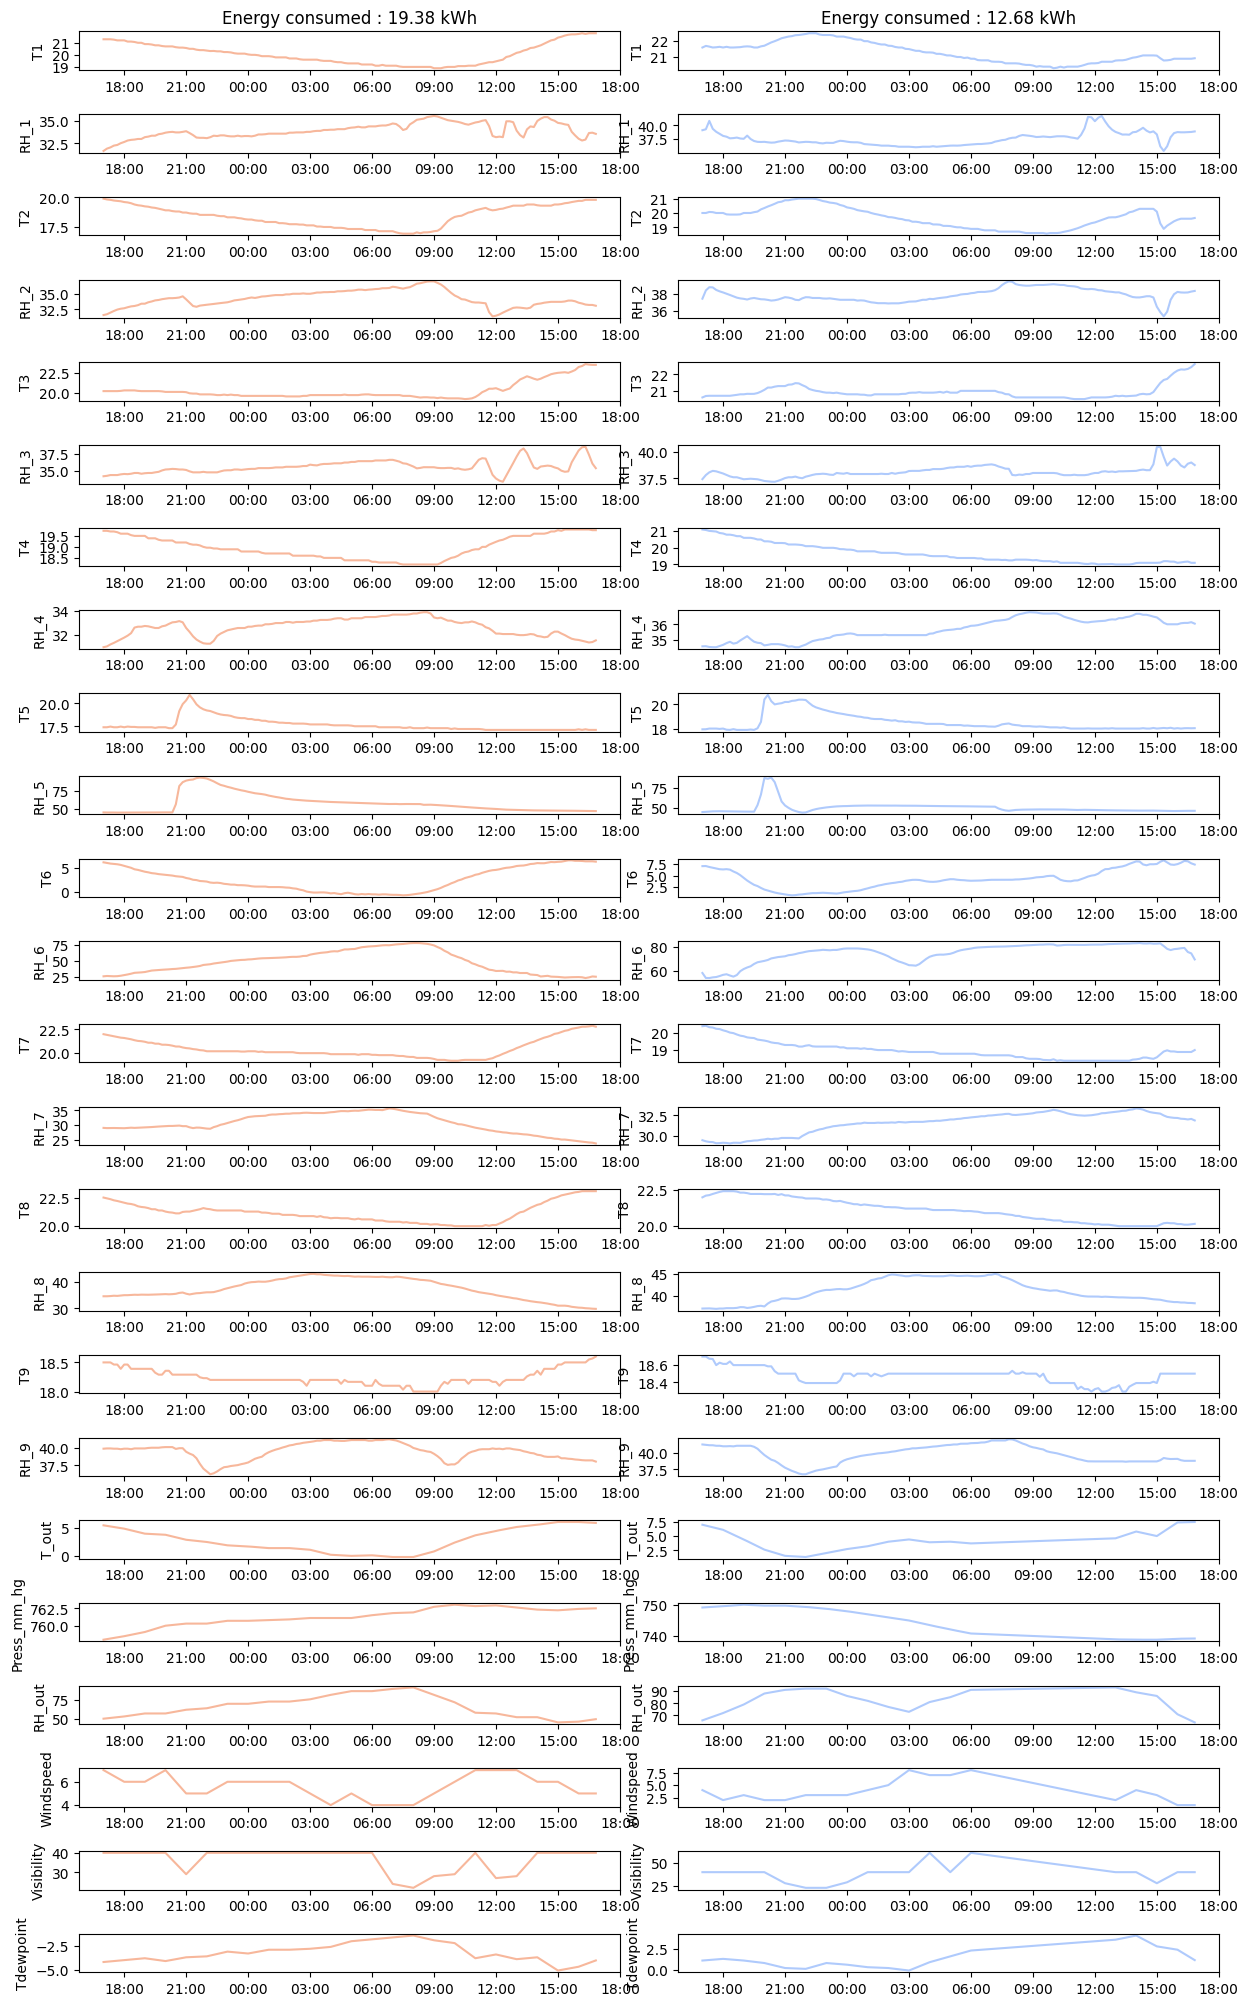

In [282]:
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.cm as cm


#First row in our trainset, a multivariate time series of 24 dimensions
samples = X_train.iloc[:2]


# Normalize y_train to a 0-1 scale
norm = mcolors.Normalize(vmin=min(y_train), vmax=max(y_train))

# Choose a colormap
cmap = cm.coolwarm #the cooler the color, the less energy consumed

fig, axes = plt.subplots(nrows=24, ncols=2, figsize=(12,20))
fig.tight_layout(w_pad=2)

for (j,sample) in list(samples.iterrows()):
    color = cmap(norm(y_train[j]))

    for i in range(24):
        axes[i,j].plot(sample[i],color=color)
        axes[i,j].set_ylabel(columns[i])
        axes[i,j].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axes[0,j].set_title(f'Energy consumed : {y_train[j]} kWh')

# Feature extraction : TSFEL

We extract all features

In [289]:
# Get the TSFEL feature configuration
import pandas as pd
cfg = tsfel.get_features_by_domain()

In [ ]:
# Extract features for each variable and concatenate them
X_train_features = []
for dim in tqdm(range(X_train.shape[1])): #iterate over dimensions
    temp_features = tsfel.time_series_features_extractor(cfg, [X_train.iloc[i, dim] for i in range(X_train.shape[0])], fs=fs)
    X_train_features.append(temp_features)

X_train_features = pd.concat(X_train_features, axis=1)
X_train_features

In [297]:
X_test_features = []
for dim in tqdm(range(X_test.shape[1])): #iterate over dimensions
    temp_features = tsfel.time_series_features_extractor(cfg, [X_test.iloc[i, dim] for i in range(X_test.shape[0])], fs=fs)
    X_test_features.append(temp_features)

X_test_features = pd.concat(X_test_features, axis=1)
X_test_features

  0%|          | 0/24 [00:00<?, ?it/s]

*** Feature extraction started ***


  4%|▍         | 1/24 [00:04<01:36,  4.18s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


  8%|▊         | 2/24 [00:08<01:32,  4.19s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 12%|█▎        | 3/24 [00:12<01:27,  4.17s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 17%|█▋        | 4/24 [00:16<01:23,  4.18s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 21%|██        | 5/24 [00:20<01:19,  4.21s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 25%|██▌       | 6/24 [00:25<01:18,  4.34s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 29%|██▉       | 7/24 [00:30<01:16,  4.51s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 33%|███▎      | 8/24 [00:34<01:10,  4.38s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 38%|███▊      | 9/24 [00:39<01:07,  4.47s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 42%|████▏     | 10/24 [00:43<01:01,  4.43s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 46%|████▌     | 11/24 [00:48<00:59,  4.56s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 50%|█████     | 12/24 [00:53<00:55,  4.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 54%|█████▍    | 13/24 [00:57<00:50,  4.61s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 58%|█████▊    | 14/24 [01:02<00:46,  4.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 62%|██████▎   | 15/24 [01:07<00:41,  4.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 67%|██████▋   | 16/24 [01:11<00:36,  4.56s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 71%|███████   | 17/24 [01:15<00:31,  4.50s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 75%|███████▌  | 18/24 [01:20<00:26,  4.48s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 79%|███████▉  | 19/24 [01:25<00:22,  4.56s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 83%|████████▎ | 20/24 [01:29<00:17,  4.44s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 88%|████████▊ | 21/24 [01:34<00:14,  4.75s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 92%|█████████▏| 22/24 [01:40<00:10,  5.05s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


 96%|█████████▌| 23/24 [01:45<00:05,  5.01s/it]


*** Feature extraction finished ***
*** Feature extraction started ***


100%|██████████| 24/24 [01:49<00:00,  4.57s/it]


*** Feature extraction finished ***


,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,...,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
0,1.990781e+06,71524.253008,43295.717355,0.030746,-0.004965,0.000000,0.000000,0.0,0.0,2.0,...,0.029138,0.083333,0.050000,7.0,2.0,6.0,144.484071,0.043396,16.766667,0.0
1,1.885295e+06,64108.213432,44389.059028,0.023497,-0.000233,0.000000,0.000000,3.0,0.0,5.0,...,-0.047786,0.066667,-0.050000,5.0,2.0,5.0,143.540817,-0.048925,10.233333,1.0
2,1.851379e+06,61961.945464,42018.957996,0.035455,-0.016853,0.033333,0.000000,3.0,0.0,5.0,...,-0.004429,0.033333,-0.016667,4.0,2.0,3.0,143.484308,-0.010067,8.366667,0.0
3,1.990531e+06,71460.083111,44446.031696,0.021399,0.000699,0.000000,0.000000,1.0,1.0,2.0,...,-0.039627,0.100000,0.000000,5.0,3.0,4.0,147.670663,-0.029188,23.333333,0.0
4,1.945298e+06,68269.850070,44687.099286,0.023928,0.004895,0.000000,0.000000,4.0,0.0,5.0,...,-0.024359,0.150000,-0.050000,5.0,3.0,6.0,147.769730,0.004261,28.483333,0.0
5,1.883591e+06,63988.100356,43841.725777,0.028834,0.000256,0.000000,0.000000,2.0,1.0,2.0,...,0.006294,0.116667,0.033333,6.0,4.0,7.0,144.035067,0.025842,14.300000,5.0
6,2.022909e+06,73795.821494,44407.770747,0.021841,-0.001235,0.000000,0.000000,7.0,0.0,6.0,...,0.011538,0.083333,0.000000,5.0,5.0,7.0,144.462900,-0.006339,15.750000,0.0
7,1.926739e+06,67029.407890,43192.828167,0.025921,-0.007692,0.000000,0.000000,1.0,0.0,1.0,...,0.007809,0.033333,0.016667,2.0,3.0,3.0,143.112227,0.002691,4.483333,0.0
8,1.875352e+06,63472.030235,43840.848187,0.036277,0.003497,0.031429,0.000000,5.0,0.0,3.0,...,-0.004545,0.066667,0.016667,5.0,5.0,7.0,143.653293,0.010607,11.650000,0.0
9,1.929600e+06,67221.050925,42757.581412,0.024499,-0.011818,0.000000,0.000000,2.0,0.0,2.0,...,0.010373,0.050000,0.016667,5.0,2.0,5.0,143.330744,0.012922,8.283333,0.0


---

In [ ]:
# Extract features for each variable and concatenate them
extracted_features_train = []
for i in tqdm(range(x_train.shape[1])):
    temp_features = tsfel.time_series_features_extractor(cfg, [x_train[j, i, :] for j in range(x_train.shape[0])], fs=fs)
    extracted_features_train.append(temp_features)

x_train_features = pd.concat(extracted_features_train, axis=1)

# Extract features for each variable and concatenate them
extracted_features_test = []
for i in tqdm(range(x_test.shape[1])):
    temp_features = tsfel.time_series_features_extractor(cfg, [x_test[j, i, :] for j in range(x_test.shape[0])], fs=fs)
    extracted_features_test.append(temp_features)

x_test_features = pd.concat(extracted_features_test, axis=1)

In [57]:

# find columns where train_features contains NaN values
nan_columns = x_train_features.columns[x_train_features.isna().any()].tolist()
x_train_features.drop(nan_columns, axis=1, inplace=True)

x_test_features.drop(nan_columns, axis=1, inplace=True)

In [58]:
x_train_features.shape

(95, 4896)

In [59]:
corr_features = tsfel.correlated_features(x_train_features)


In [60]:
len(corr_features)

4896

In [61]:
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing

# Remove low variance features
selector = VarianceThreshold()
x_train_features_selected = selector.fit_transform(x_train_features)

In [62]:
x_test_features_selected = pd.DataFrame(selector.transform(x_test_features))

In [63]:
x_train_features_selected=pd.DataFrame(x_train_features_selected,)
print(x_train_features_selected.shape)
corr_features = tsfel.correlated_features(x_train_features_selected)
len(corr_features)

(95, 4344)


1823

In [64]:
# Highly correlated features are removed
x_train_features_selected.drop(corr_features, axis=1, inplace=True)
x_test_features_selected.drop(corr_features, axis=1, inplace=True)


# Normalising Features
scaler = preprocessing.StandardScaler()
nx_train_features_selected = pd.DataFrame(scaler.fit_transform(x_train_features_selected))
nx_test_features_selected = pd.DataFrame(scaler.transform(x_test_features_selected))

In [65]:
nx_train_features_selected.shape

(95, 2521)

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train a random forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(nx_train_features_selected, y_train)

# Make predictions on the test set and evaluate the model
y_pred = regressor.predict(nx_test_features_selected)
mse = mean_squared_error(y_test, y_pred)

# Results
mse

4.356523381666666

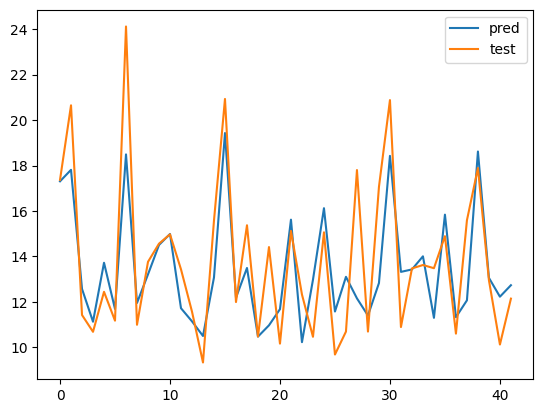

In [67]:
plt.plot(y_pred, label = 'pred')
plt.plot(y_test, label='test')
plt.legend()

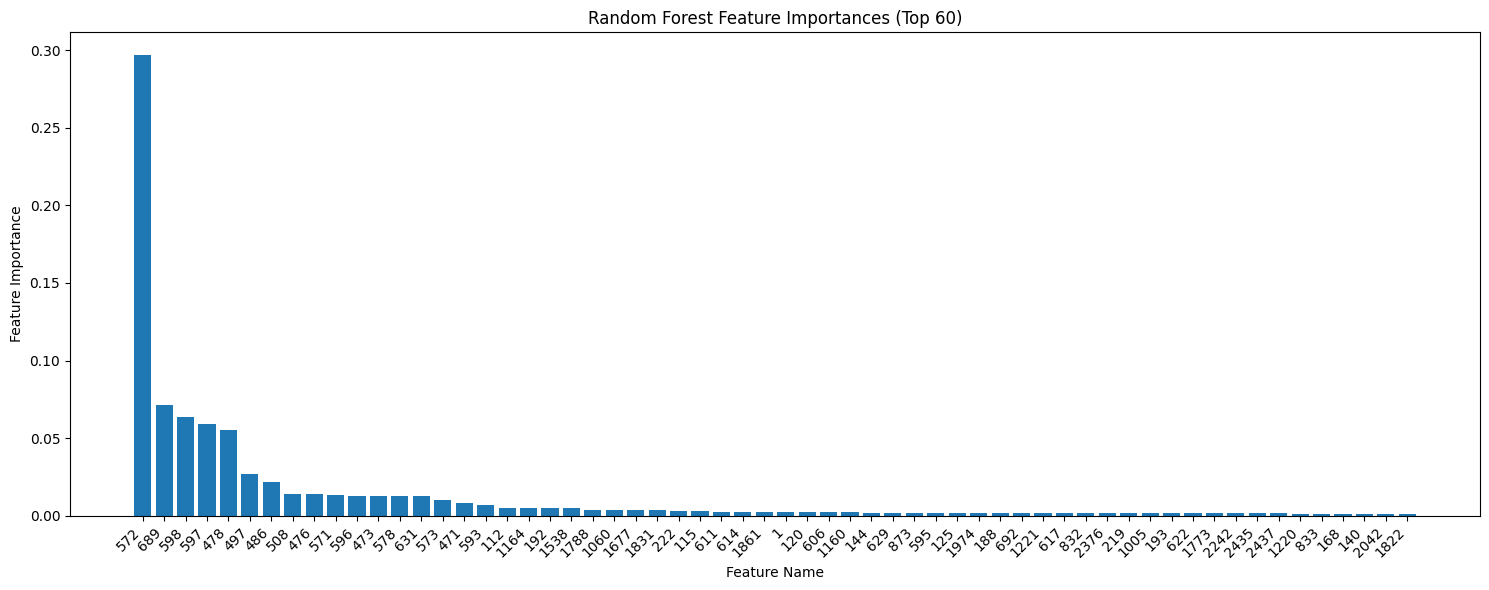

In [68]:

feature_names = nx_train_features_selected.columns.tolist()
feature_importances = regressor.feature_importances_

# Sort indices based on feature importance
indices = np.argsort(feature_importances)[::-1]

# Plotting the feature importances with feature names
# Plotting the feature importances for the first 60 features
plt.figure(figsize=(15, 6))
plt.bar(range(60), feature_importances[indices][:60], align="center")
plt.xticks(range(60), [feature_names[i] for i in indices][:60], rotation=45, ha="right")
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importances (Top 60)")
plt.tight_layout()
plt.show()

## Adding a feature of time
 

In [85]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from custom_code.utils import uniform_scaling

In [106]:
def process_data(X, min_len, normalise=None):
    """
    This is a function to process the data, i.e. convert dataframe to numpy array
    :param X:
    :param min_len:
    :param normalise:
    :return:
    """
    tmp = []
    for i in tqdm(range(len(X))):
        _x = X.iloc[i, :].copy(deep=True)

        # 1. find the maximum length of each dimension
        all_len = [len(y) for y in _x]
        max_len = max(all_len)

        # 2. adjust the length of each dimension
        _y = []
        for y in _x:
            # 2.1 fill missing values
            if y.isnull().any():
                y = y.interpolate(method='linear', limit_direction='both')

            # 2.2. if length of each dimension is different, uniformly scale the shorted one to the max length
            if len(y) < max_len:
                y = uniform_scaling(y, max_len)
            _y.append(y)
        _y.append(y.index.dayofweek)
        _y = np.array(np.transpose(_y))

        # 3. adjust the length of the series, chop of the longer series
        _y = _y[:min_len, :]

        # 4. normalise the series
        if normalise == "standard":
            scaler = StandardScaler().fit(_y)
            _y = scaler.transform(_y)
        if normalise == "minmax":
            scaler = MinMaxScaler().fit(_y)
            _y = scaler.transform(_y)

        tmp.append(_y)
    X = np.array(tmp)
    return X

In [109]:
process_data(X_train,min_len)[:,:,-1]

100%|██████████| 95/95 [00:00<00:00, 482.58it/s]


array([[6., 6., 6., ..., 0., 0., 0.],
       [3., 3., 3., ..., 4., 4., 4.],
       [3., 3., 3., ..., 4., 4., 4.],
       ...,
       [4., 4., 4., ..., 5., 5., 5.],
       [3., 3., 3., ..., 4., 4., 4.],
       [5., 5., 5., ..., 6., 6., 6.]])

In [110]:
x_train = process_data(X_train, min_len=min_len)
x_test = process_data(X_test, min_len=min_len)

100%|██████████| 42/42 [00:00<00:00, 566.83it/s]


In [111]:
x_train = x_train.transpose((0,2,1)) #shape (n_cases, n_channels, n_timepoints)
x_test = x_test.transpose((0,2,1)) #shape (n_cases, n_channels, n_timepoints)


In [112]:
x_train.shape

(95, 25, 144)

In [123]:
x_train[:, :, -1].shape

(95, 25)

In [125]:
extracted_features_train[0].shape

(95, 206)

In [ ]:
# Get the TSFEL feature configuration
import pandas as pd
cfg = tsfel.get_features_by_domain()

# Extract features for each variable and concatenate them
extracted_features_train = []
for i in range(x_train.shape[1]-1):
    temp_features = tsfel.time_series_features_extractor(cfg, [x_train[j, i, :] for j in range(x_train.shape[0])], fs=fs,verbose=0)
    extracted_features_train.append(temp_features)
extracted_features_train.append(pd.DataFrame(x_train[:, -1, :].mean(axis=1)))

# Extract features for each variable and concatenate them
extracted_features_test = []
for i in range(x_test.shape[1]-1):
    temp_features = tsfel.time_series_features_extractor(cfg, [x_test[j, i, :] for j in range(x_test.shape[0])], fs=fs,verbose=0)
    extracted_features_test.append(temp_features)
extracted_features_test.append(pd.DataFrame(x_test[:, -1, :].mean(axis=1)))


In [160]:
x_train_features = pd.concat(extracted_features_train, axis=1)
x_test_features = pd.concat(extracted_features_test, axis=1)

In [161]:

# find columns where train_features contains NaN values
nan_columns = x_train_features.columns[x_train_features.isna().any()].tolist()
x_train_features.drop(nan_columns, axis=1, inplace=True)

x_test_features.drop(nan_columns, axis=1, inplace=True)

In [162]:
x_train_features.rename(columns={0:'mean_day_of_week'},inplace=True)

In [163]:
x_test_features.rename(columns={0:'mean_day_of_week'},inplace=True)

In [164]:
zero_std_features = x_train_features.columns[x_train_features.std() ==0]
num_zero_std_features = len(zero_std_features)

print(f"Number of features with standard deviation equal to zero: {num_zero_std_features}")
print("Features with standard deviation equal to zero:")
print(zero_std_features)

Number of features with standard deviation equal to zero: 480
Features with standard deviation equal to zero:
Index(['0_ECDF_0', '0_ECDF_1', '0_ECDF_3', '0_ECDF_4', '0_ECDF_7', '0_ECDF_8',
       '0_ECDF_9', '0_Histogram_0', '0_Histogram_1', '0_Histogram_2',
       ...
       '0_ECDF Percentile Count_0', '0_ECDF Percentile Count_1', '0_ECDF_0',
       '0_ECDF_1', '0_ECDF_3', '0_ECDF_4', '0_ECDF_7', '0_ECDF_8', '0_ECDF_9',
       '0_Human range energy'],
      dtype='object', length=480)


In [165]:
x_train_features.drop(zero_std_features, axis=1, inplace=True)
x_test_features.drop(zero_std_features, axis=1, inplace=True)

In [137]:
from sklearn import preprocessing


In [170]:
# Normalising Features
scaler = preprocessing.StandardScaler()
nx_train_features = pd.DataFrame(scaler.fit_transform(x_train_features))
nx_test_features = pd.DataFrame(scaler.transform(x_test_features))

In [171]:
corr_features = tsfel.correlated_features(nx_train_features,threshold=0.99)
len(corr_features)

1353

In [172]:
# Highly correlated features are removed
nx_train_features.drop(corr_features, axis=1, inplace=True)
nx_test_features.drop(corr_features, axis=1, inplace=True)


In [173]:
nx_train_features.shape

(95, 2920)

In [174]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train a random forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(nx_train_features_selected, y_train)

# Make predictions on the test set and evaluate the model
y_pred = regressor.predict(nx_test_features_selected)
mse = mean_squared_error(y_test, y_pred)

# Results
mse

4.367099733095236

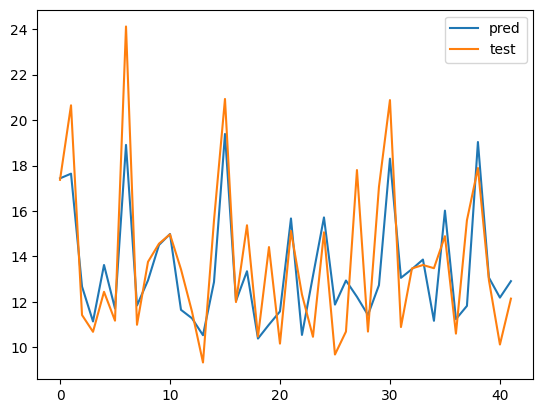

In [175]:
plt.plot(y_pred, label = 'pred')
plt.plot(y_test, label='test')
plt.legend()

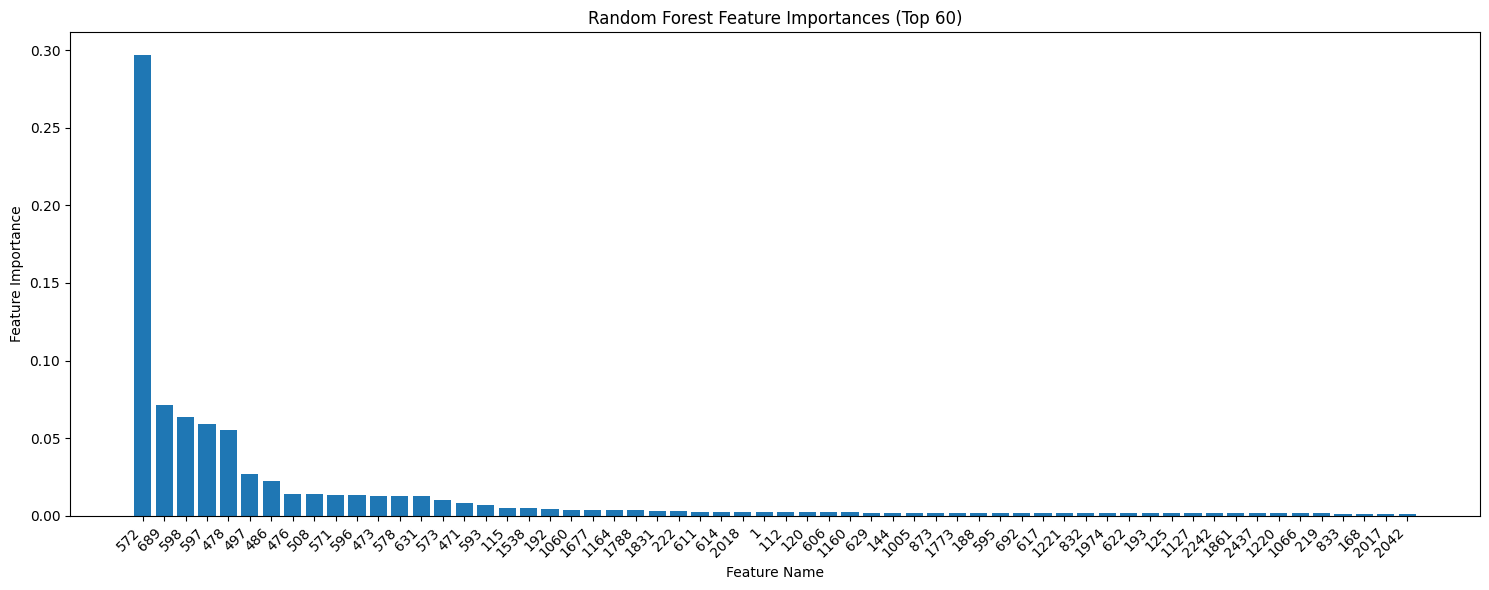

In [176]:

feature_names = nx_train_features_selected.columns.tolist()
feature_importances = regressor.feature_importances_

# Sort indices based on feature importance
indices = np.argsort(feature_importances)[::-1]

# Plotting the feature importances with feature names
# Plotting the feature importances for the first 60 features
plt.figure(figsize=(15, 6))
plt.bar(range(60), feature_importances[indices][:60], align="center")
plt.xticks(range(60), [feature_names[i] for i in indices][:60], rotation=45, ha="right")
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importances (Top 60)")
plt.tight_layout()
plt.show()